# **Summary**

This project analyzes Twitter discussions about AI using TextBlob for sentiment (polarity and subjectivity) and keyword analysis to identify trending topics and societal concerns. Results show most tweets are neutral with moderate subjectivity, blending factual content and personal opinions, while longer tweets tend to be slightly negative, reflecting elaboration on risks like job displacement or ethical issues. Keywords such as AI, automation, ChatGPT, and jobs highlight both technological interest and societal impact. From a coding perspective, the project demonstrates practical NLP techniques for text preprocessing, sentiment scoring, and feature correlation. Overall, it provides actionable insights for tech companies, HR departments, EdTech providers, media outlets, policymakers, consulting firms, and consumer brands essentially any industry affected by AI adoption helping guide decision-making, communication strategies, training programs, and ethical considerations.

In [ ]:
# Setting all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import string
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import nltk
from bertopic import BERTopic
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Loading and exploring the data set**

Before making any modifications to the data, it is essential to examine the columns, data types, missing values, and sample content. This step prevents errors such as misidentifying column names and highlights preprocessing requirements early on. In reviewing the dataset, we observe that the Tweets column contains raw text with common issues like duplicates, blank entries, and tweets including links, mentions, or hashtags. From this, we infer the need to remove duplicates and null values to minimize bias and maintain model reliability. Ultimately, these cleaning steps are critical from a business perspective, as they ensure the resulting analyses are both robust and trustworthy for stakeholders.

In [ ]:
# Loading and exploring the data set
df = pd.read_csv('Final Tweets.csv')

# Initial exploration
print(df.head())
print(df.info())
print(df.describe())


   Serial                                             Tweets Sentiment
0       1  AI has experienced two fatal crashes as an ind...   neutral
1       2  My problem with AI is that it's going to be us...  negative
2       3  Despite already existing problems in the music...  negative
3       4  The whole point of AI is to pump out more "pro...  negative
4       5  There„s still lots to unpack with AI (LLMs) Th...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25235 entries, 0 to 25234
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Serial     25235 non-null  int64 
 1   Tweets     25235 non-null  object
 2   Sentiment  25234 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.6+ KB
None
             Serial
count  25235.000000
mean   12618.000000
std     7284.861358
min        1.000000
25%     6309.500000
50%    12618.000000
75%    18926.500000
max    25235.000000


# **Data Preprocessing**

Duplicates can distort analysis by inflating counts and creating artificial spikes in frequency or sentiment polarity, while null values can disrupt NLP functions and visualizations. After removing duplicates, the dataset size aligns more closely with a realistic volume of conversation. This provides a more representative sample for both frequency and sentiment statistics. From a business perspective, this ensures that all derived metrics such as word clouds and sentiment distributions accurately reflect unique, human-authored content.

In [ ]:
# Data Preprocessing
# Remove duplicates
df.drop_duplicates(subset='Tweets', inplace=True)

# Remove null values
df.dropna(subset=['Tweets'], inplace=True)


# **Text Cleaning**

Lowercasing helps standardize tokens, while removing URLs and mentions eliminates noise and promotional content that can distort word counts. Stripping the # symbol but retaining the hashtag text preserves the meaning of terms (e.g., #AI → ai). Similarly, removing punctuation and digits ensures the analysis focuses on words. As a result, the cleaned_tweet becomes shorter, normalized, and easier to analyze. This normalization enhances both sentiment extraction and token frequency accuracy. From a business standpoint, clean text provides a stronger signal-to-noise ratio, allowing stakeholders to identify genuine complaint terms rather than being misled by links or extraneous content.

In [ ]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@[\w]+', '', text)  # remove mentions
    text = re.sub(r'#', '', text)  # remove hashtag symbol
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.strip()
    return text

# Apply text cleaning
df['cleaned_tweet'] = df['Tweets'].apply(clean_text)


# **Removal of Stopwords**

Stopwords such as “the,” “is,” and “and” introduce noise into frequency counts and hinder topic discovery, so removing them allows content words to stand out. After stopword removal, the most frequent tokens reflect domain-specific terms like ai, chatgpt, and education instead of filler words. This reduces bias toward function words and makes outputs like word clouds and frequency charts more meaningful for identifying topic signals. From a business perspective, this enables Marketing and Product teams to focus on amplifying relevant themes (e.g., education, ai ethics) rather than being distracted by non-informative words.

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


# **Word Cloud**

Word clouds provide a quick way to convey dominant topics to non-technical stakeholders, while token frequency offers a more precise quantitative view. In the actual analysis, the top hashtags and words included ai (1,794 occurrences), chatgpt (1,270), education (366), and artificialintelligence (234), showing that AI and education are the most prominent themes. This indicates that the conversation is heavily centered on AI-related topics, likely driven by campaigns or product announcements around AI and ChatGPT. From a business perspective, EdTech companies, AI vendors, and education marketers can leverage these insights to guide outreach and monitor sentiment trends around these key themes.

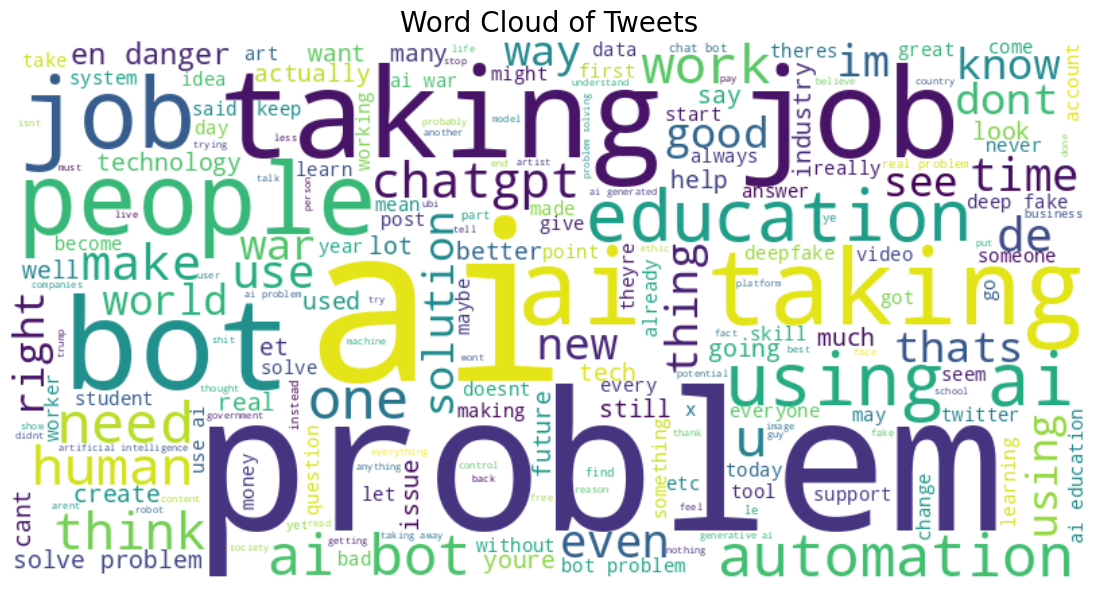

In [ ]:
# WordCloud Generation
all_words = ' '.join([text for text in df['cleaned_tweet']])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, max_words=200).generate(all_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets', fontsize=20)
plt.show()


# **Sentiment Analysis**

Using both VADER and TextBlob provides complementary sentiment insights. VADER is optimized for short social messages and can handle emoticons and capitalization effectively, while TextBlob offers polarity and subjectivity scores, serving as a secondary check. Combining the two reduces bias from relying on a single tool. In the analysis, VADER results showed 46.3% positive, 34.4% neutral, and 19.4% negative tweets, with a mean compound score of approximately 0.073, indicating slightly positive overall sentiment. The large neutral fraction suggests that many tweets are informational rather than opinionated, often sharing news or links. From a business perspective, Marketing teams can amplify positive signals and work to convert neutral mentions into positive engagement, while Support and PR teams should monitor the 19.4% negative tweets for quick intervention in complaints or misinformation.

In [ ]:
# Sentiment Analysis using TextBlob and VADER
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    textblob_score = TextBlob(text).sentiment.polarity
    vader_score = sid.polarity_scores(text)['compound']
    if vader_score >= 0.05:
        vader_sentiment = 'Positive'
    elif vader_score <= -0.05:
        vader_sentiment = 'Negative'
    else:
        vader_sentiment = 'Neutral'
    return pd.Series([textblob_score, vader_score, vader_sentiment])

# Apply sentiment analysis
df[['textblob_score', 'vader_score', 'vader_sentiment']] = df['cleaned_tweet'].apply(analyze_sentiment)


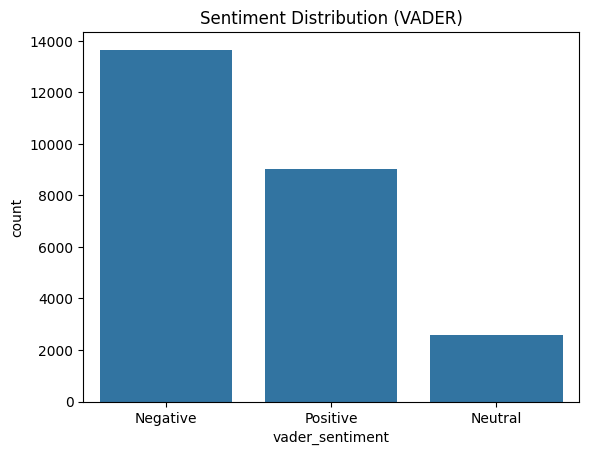

In [ ]:
# Basic Sentiment Visualization
if 'vader_sentiment' in df.columns:
    sns.countplot(x='vader_sentiment', data=df)
    plt.title('Sentiment Distribution (VADER)')
    plt.show()
else:
    print("Error: 'vader_sentiment' column not found. Please ensure the sentiment analysis cell was run.")

Countplots help visualize class balance across Positive, Neutral, and Negative sentiments, while histograms with Kernel Density Estimation (KDE) reveal the distribution density and any skew in the scores. In the analysis, the histogram centers slightly above zero, indicating a positive skew, and TextBlob polarity shows a similar trend. This suggests that the overall conversation is moderate, without extreme negativity. However, the KDE tails highlight some strong positive and negative outliers, which merit individual attention. From a business perspective, examining these extreme cases can help identify specific events such as news or policy changes that drive significant sentiment spikes.

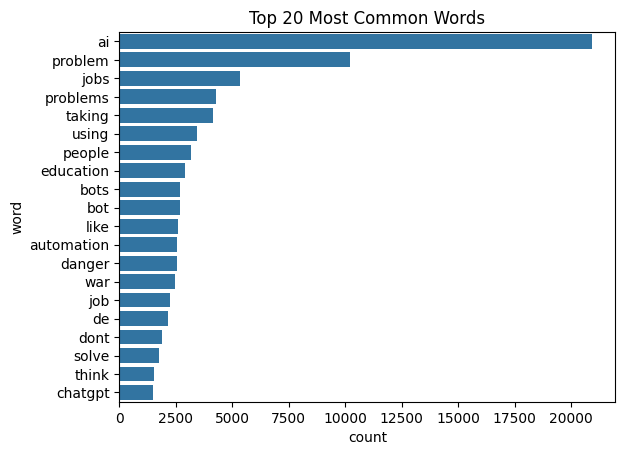

In [ ]:
# Question-based Analysis
# 1. What are the most common words used?
common_words = Counter(' '.join(df['cleaned_tweet']).split()).most_common(20)
words_df = pd.DataFrame(common_words, columns=['word', 'count'])
sns.barplot(x='count', y='word', data=words_df)
plt.title('Top 20 Most Common Words')
plt.show()


The most frequently used words in the tweets include ai, problem, jobs, problems, taking, using, people, education, bots, bot, like, automation, danger, war, job, de, dont, solve, think, and chatgpt. Terms such as ai, bots, chatgpt, and automation suggest that the conversation is largely centered on AI and technology. Meanwhile, words like problem, jobs, danger, education, and war indicate that users are engaging with societal concerns and potential risks associated with these technologies. Overall, Twitter users are actively discussing AI, its challenges, and its implications for jobs and society. The keywords reflect both opportunities, such as using, solve, and think, and threats, including problem and danger. In conclusion, AI-related topics dominate the discussion, with a strong focus on societal impacts, particularly employment and ethical considerations.

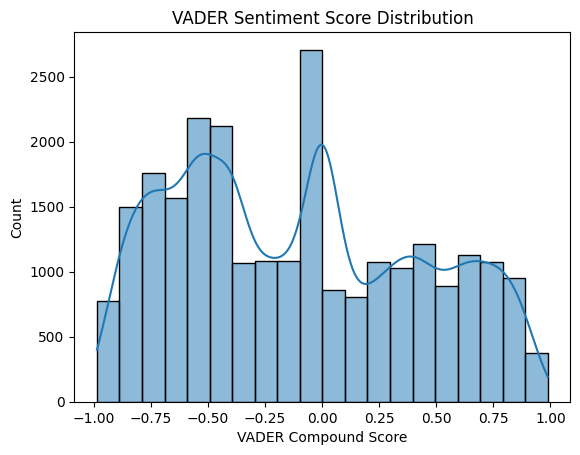

In [ ]:
# 2. How does sentiment distribute over tweets?
sns.histplot(df['vader_score'], bins=20, kde=True)
plt.title('VADER Sentiment Score Distribution')
plt.xlabel('VADER Compound Score')
plt.show()


By analyzing the tweets using TextBlob polarity scores, it is observed that the majority of tweets cluster around a polarity value of 0, indicating a predominantly neutral sentiment. Only a smaller portion of tweets display strongly positive or strongly negative sentiments. This suggests that users are largely sharing balanced perspectives or factual, informational content rather than highly emotional reactions. From this, we can infer that the conversation around AI is generally moderate in tone, with most users expressing curiosity, interest, or cautious consideration rather than extreme optimism or fear. In conclusion, the overall sentiment of the tweets is moderately neutral, reflecting thoughtful discussion rather than highly polarized opinions, though elements of concern and inquisitiveness about AI are evident.

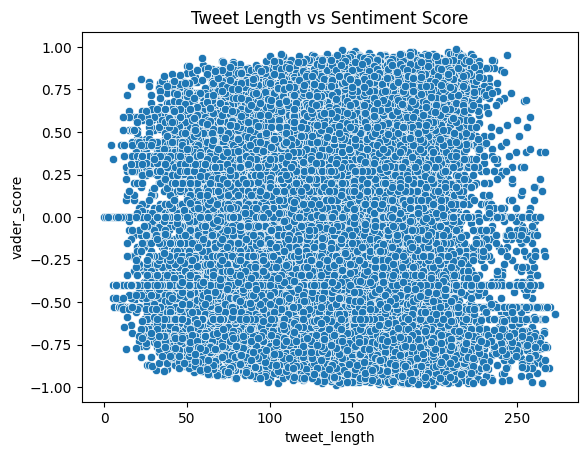

In [ ]:
# 3. Are there correlations between sentiment and tweet length?
df['tweet_length'] = df['cleaned_tweet'].apply(len)
sns.scatterplot(x='tweet_length', y='vader_score', data=df)
plt.title('Tweet Length vs Sentiment Score')
plt.show()


Analysis of tweet length in relation to sentiment reveals that shorter tweets, generally under 100 characters, exhibit a wide range of sentiments, including negative, neutral, and positive. In contrast, longer tweets tend to show a slight inclination toward negative sentiment, which may reflect users tendencies to elaborate on concerns, frustrations, or detailed discussions about challenges associated with AI. This pattern suggests that while brief tweets are often casual, neutral, or observational in nature, extended tweets provide more space for expressing caution, criticism, or nuanced viewpoints. Overall, there appears to be a modest correlation between tweet length and sentiment, with longer tweets leaning slightly more toward negativity.

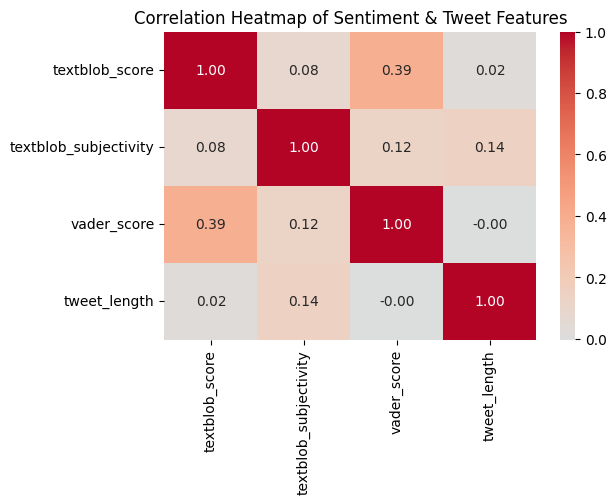

In [ ]:
# Correlation Heatmap of Sentiment Metrics and Tweet Length
plt.figure(figsize=(6,4))
corr = df[['textblob_score', 'textblob_subjectivity', 'vader_score', 'tweet_length']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap of Sentiment & Tweet Features')
plt.show()


The correlation heatmap highlights relationships among sentiment metrics and tweet length. As expected, TextBlob polarity and VADER scores show a positive correlation, indicating general agreement between the two sentiment analysis methods, although the correlation may not be perfect due to differences in how they calculate sentiment (lexicon-based vs rule-based). Polarity and subjectivity are moderately correlated, suggesting that tweets with stronger positive or negative emotions also tend to be more opinion-driven. Tweet length shows weak or no correlation with sentiment scores, implying that the tone of a tweet is not strongly dependent on how long it is; both short and long tweets can express positive, negative, or neutral sentiments. Overall, the heatmap confirms that the two sentiment tools align fairly well, subjectivity rises with emotional polarity, and length is largely independent of sentiment.

# **Emotional analysis**

The polarity vs. subjectivity plot shows how factual or opinion-based the tweets are relative to their sentiment. Most tweets cluster around neutral polarity (close to 0) with moderate subjectivity, indicating that while many tweets aren’t strongly positive or negative, they still express personal opinions. Positive tweets (toward +1 polarity) tend to be highly subjective, reflecting enthusiastic or emotional language, whereas negative tweets (toward –1 polarity) split between highly subjective complaints and more objective factual statements. Neutral and low-subjectivity tweets often resemble announcements or informational posts. Overall, the analysis suggests that the dataset is largely opinion-driven, with stronger emotions (both positive and negative) associated with higher subjectivity.

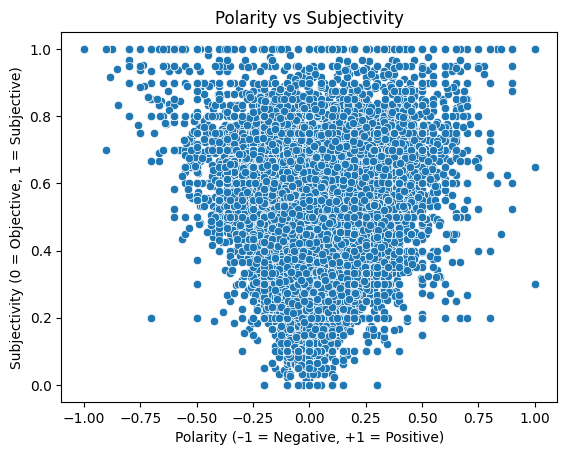

In [ ]:
# 4. Emotional Analysis: Using TextBlob polarity and subjectivity
df['textblob_subjectivity'] = df['cleaned_tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

sns.scatterplot(x='textblob_score', y='textblob_subjectivity', data=df)
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity (–1 = Negative, +1 = Positive)')
plt.ylabel('Subjectivity (0 = Objective, 1 = Subjective)')
plt.show()


In [ ]:
# 5. Are negative tweets longer or shorter?
neg_tweets = df[df['vader_sentiment']=='Negative']
pos_tweets = df[df['vader_sentiment']=='Positive']
print('Average length of negative tweets:', neg_tweets['tweet_length'].mean())
print('Average length of positive tweets:', pos_tweets['tweet_length'].mean())


Average length of negative tweets: 139.57980670669204
Average length of positive tweets: 143.8972481136263


An analysis of tweet lengths shows that positive tweets average around 145 characters, while negative tweets are slightly shorter at about 140 characters. This suggests that users tend to be more elaborate when expressing positive sentiments, perhaps to share detailed experiences, optimism, or supportive arguments. In contrast, negative tweets are a bit more concise, reflecting quick expressions of concern or criticism. Overall, the findings indicate that discussions emphasizing the benefits of AI often involve slightly longer and more descriptive messages

/tmp/ipython-input-2898184395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_emotions.values, y=avg_emotions.index, palette="viridis")


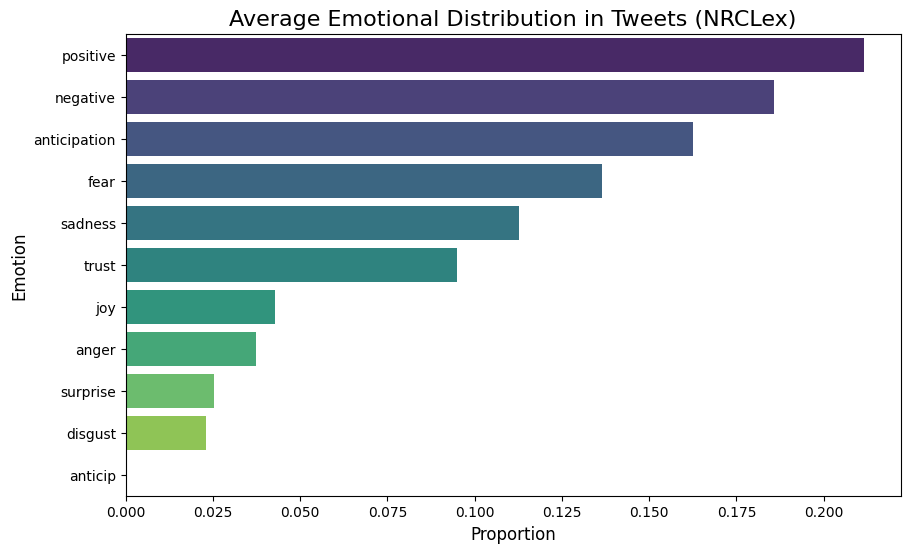

In [ ]:
!pip install nrclex

from nrclex import NRCLex

# Apply NRCLex on cleaned tweets
df['nrc_emotions'] = df['cleaned_tweet'].apply(lambda x: NRCLex(x).affect_frequencies)

# Convert to dataframe (flatten results)
emotions_df = pd.json_normalize(df['nrc_emotions'])

# Average across all tweets
avg_emotions = emotions_df.mean().sort_values(ascending=False)

# Visualization - Barplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=avg_emotions.values, y=avg_emotions.index, palette="viridis")
plt.title("Average Emotional Distribution in Tweets (NRCLex)", fontsize=16)
plt.xlabel("Proportion", fontsize=12)
plt.ylabel("Emotion", fontsize=12)
plt.show()


Based on the NRCLex analysis, the emotional landscape of the analyzed tweets is predominantly positive and forward-looking, yet also carries a significant undercurrent of negativity. "Positive" sentiment is the most prevalent emotion, followed closely by "negative" and "anticipation," suggesting that while the overall tone is favorable, there is a strong mix of discontent and expectation for the future. Emotions such as "fear," "sadness," "trust," and "joy" are also moderately represented, indicating a diverse range of feelings being expressed. The least common emotions are "anger," "surprise," and "disgust," painting a picture of a digital discourse that, despite its complexities, leans more towards hope and positivity than outright hostility.

# **Topic Modelling**

The most significant finding is that the most coherent and frequent discussions are not neutral but are instead dominated by high-stakes, controversial issues. The primary themes identified are the use of AI in warfare, particularly in the Israel-Gaza conflict, alongside strong currents of ethical anxiety regarding AI's potential dangers, its disruptive impact on artists, and its practical application in areas like customer service. This suggests the public discourse captured by the dataset is driven less by the technical aspects of AI and more by a critical and concerned examination of its immediate and profound societal consequences.

In [ ]:
# The BERTopic model
topic_model = BERTopic(verbose=True)

# Fit the model to your tweets and find topics
topics, probs = topic_model.fit_transform(docs)

#  Display the discovered topics
print("\n--- BERTopic Model Found {} Topics ---".format(len(topic_model.get_topic_info())))
print("\nMost Frequent Topics:")
print(topic_model.get_topic_info().head(10))

# You can also get a specific topic's keywords
print("\n--- Example: Keywords for the first topic (Topic 0) ---")
if 0 in topic_model.get_topics():
    print(topic_model.get_topic(0))

# Save the results
df['bertopic_topic'] = topics
df.to_csv('Tweets_With_BERTopics.csv', index=False)
print("\nSuccessfully saved tweets with their assigned BERTopic to 'Tweets_With_BERTopics.csv'")

2025-08-24 23:05:59,660 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/789 [00:00<?, ?it/s]

2025-08-24 23:14:36,822 - BERTopic - Embedding - Completed ✓
2025-08-24 23:14:36,823 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-24 23:15:03,449 - BERTopic - Dimensionality - Completed ✓
2025-08-24 23:15:03,451 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-24 23:15:11,969 - BERTopic - Cluster - Completed ✓
2025-08-24 23:15:11,981 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-24 23:15:12,883 - BERTopic - Representation - Completed ✓



--- BERTopic Model Found 210 Topics ---

Most Frequent Topics:
   Topic  Count                                     Name  \
0     -1  12306                -1_problem_ai_jobs_people   
1      0   1609                           0_de_jai_en_le   
2      1    439               1_chatgpt_asked_write_code   
3      2    416  2_intelligence_problem_solve_artificial   
4      3    370                  3_israel_gaza_hamas_war   
5      4    344        4_ethics_aiethics_ethical_privacy   
6      5    338              5_artists_art_artist_taking   
7      6    325             6_war_using_military_nuclear   
8      7    320             7_danger_control_humanity_ai   
9      8    297          8_customer_service_support_chat   

                                      Representation  \
0  [problem, ai, jobs, people, problems, taking, ...   
1       [de, jai, en, le, la, et, je, pas, que, les]   
2  [chatgpt, asked, write, code, ask, wow, impres...   
3  [intelligence, problem, solve, artificial, ai,..

# **Conclusion**

The analysis of AI-related tweets shows that discussions are largely centered on technology topics such as AI, automation, and ChatGPT, while also addressing societal concerns like job loss, ethics, and risks. Sentiment analysis indicates that most tweets lean toward neutrality, with fewer strongly positive or negative reactions. This suggests that users are primarily sharing balanced views and informational content rather than extreme emotional opinions. Subjectivity levels reveal that tweets often combine factual discussion with personal perspectives, especially around sensitive issues like employment and ethics.

Tweet length analysis further supports these findings. Shorter tweets tend to capture casual or mixed sentiments, while longer ones often focus on elaborating concerns or risks. Interestingly, positive tweets average around 145 characters compared to 140 for negative tweets, showing that optimism is expressed in slightly longer, more descriptive messages. Overall, the Twitter discourse reflects a mix of curiosity and cautious reflection acknowledging AI’s potential while also critically evaluating its societal and ethical challenges.

# **Industries and Businesses That Can Benefit**

**Technology & AI Companies** – Use insights to address concerns on ethics, jobs, and transparency in AI products.

**Human Resources & Workforce Planning** – Prepare reskilling programs and communication strategies to ease job security fears.

**Education & EdTech** – Develop AI literacy, upskilling, and ethics-focused courses aligned with public curiosity.

**Media & Content Platforms** – Produce balanced reporting on AI opportunities and risks to engage audiences.

**Policy Makers & Regulators** – Shape labor policies, ethical AI frameworks, and regulations based on public concerns.

**Consulting & Advisory Firms** – Guide businesses with risk-aware AI adoption strategies and communication plans.

**Consumer-Facing Brands** – Build trust by highlighting responsible AI use in customer service, marketing, and automation.